In [38]:
from astropy.table import Table, QTable, Column
import numpy as np
import astropy.units as u
from astropy.io import fits as pyfits
import matplotlib.pyplot as plt
%matplotlib inline
from astropy.coordinates import SkyCoord
from photutils import SkyCircularAperture, SkyCircularAnnulus, aperture_photometry
from astropy.io import ascii
from astropy.wcs import WCS
from scipy.stats import norm
import matplotlib.mlab as mlab
from astropy.nddata.utils import Cutout2D
from astropy.visualization import SqrtStretch
from astropy.visualization.mpl_normalize import ImageNormalize
from astropy.stats import sigma_clipped_stats
import scipy
from scipy import ndimage
from numpy.linalg import eig, inv
import matplotlib.patches as patches

##-------------------------Importing Everything I Will Need-----------------------------------##

hdu = pyfits.open('C:/Users/dougl/Desktop/smcw2-nd-intbgsub.fits', ignore_missing_end=True)
w = WCS(hdu[0].header)


In [2]:
from astropy.io import ascii
catalog = Table.read('C:/Users/dougl/Desktop/asu(1).fit', format = 'fits')
print(catalog)

 RAJ2000    IDra    DEJ2000   Umag  e_Umag ... e_Imag Flag Jmag Hmag Ksmag
   deg       h        deg     mag    mag   ...  mag        mag  mag   mag 
--------- -------- --------- ------ ------ ... ------ ---- ---- ---- -----
 5.617095 0.374473 -74.89902  20.53  0.165 ...  0.048   10  nan  nan   nan
 5.617995 0.374533 -74.88598    nan    nan ...    nan    0  nan  nan   nan
 5.618685 0.374579 -74.89183 21.784  0.497 ...  0.149    0  nan  nan   nan
 5.618955 0.374597 -74.89297    nan    nan ...   0.26    0  nan  nan   nan
  5.61939 0.374626 -74.86275    nan    nan ...    nan    0  nan  nan   nan
  5.61969 0.374646 -74.89796    nan    nan ...    nan    0  nan  nan   nan
  5.62077 0.374718 -74.88685    nan    nan ...  0.283    0  nan  nan   nan
 5.622585 0.374839 -74.89294    nan    nan ...  0.321    0  nan  nan   nan
 5.622675 0.374845 -74.89507 20.146  0.164 ...  0.216    0  nan  nan   nan
 5.623395 0.374893 -74.89001 21.913  0.506 ...  0.331    0  nan  nan   nan
      ...      ...       

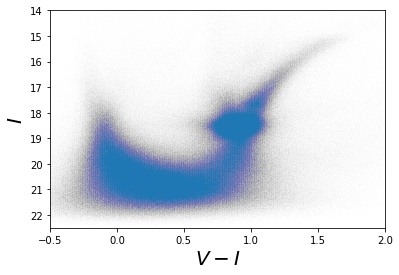

In [3]:
Vmag = catalog["Vmag"]
Imag = catalog["Imag"]
VImag = Vmag - Imag
plt.scatter(VImag, Imag, s=0.001, alpha=0.025)
plt.ylim(reversed(plt.ylim()))
plt.xlabel("$V-I$", fontsize=20)
plt.ylabel("$I$", fontsize=20)
plt.xlim(-0.5,2)
plt.ylim(22.5,14)
plt.show()

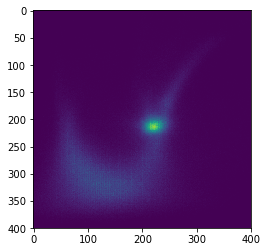

In [4]:
Vmag = catalog["Vmag"]
Imag = catalog["Imag"]
VImag = Vmag - Imag
NaNs1 = np.isnan(VImag)
NaNs2 = np.isnan(Imag)
VImag[NaNs1]= -9999
Imag[NaNs2] = -9999
bins = (400,400)
H1, xedges1, yedges1 = np.histogram2d(Imag, VImag, bins, range=[[14,22.5], [-0.5, 2]])
plt.imshow(H1)

In [5]:
ra_1=[]
dec_1=[]
Vmag_1=[]
for i in range(0,5156056):
    Vmag = catalog["Vmag"][i]
    Imag = catalog["Imag"][i]
    VImag = Vmag - Imag
    ra = catalog["RAJ2000"][i]
    dec = catalog["DEJ2000"][i]
    if -0.25 < VImag and VImag < 0.0 and 17 < Imag and Imag < 18:
        ra_1.append(ra)
        dec_1.append(dec)
        Vmag_1.append(Vmag)

loc_1 = Table()
loc_1['RAJ2000'] = ra_1
loc_1['DEJ2000'] = dec_1

In [6]:
positions_1 = SkyCoord(ra=loc_1['RAJ2000'] * u.deg, dec=loc_1['DEJ2000'] * u.deg, frame='fk5')
r=10 * u.arcsec
apertures_1 = SkyCircularAperture(positions_1, r)
phot_table_1 = aperture_photometry(hdu[0], apertures_1)

In [7]:
Flux_1 = phot_table_1['aperture_sum']
NUV_magnitude_1 = -2.5*np.log10(Flux_1) + 20.08

C:\Users\dougl\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: invalid value encountered in log10
  from ipykernel import kernelapp as app


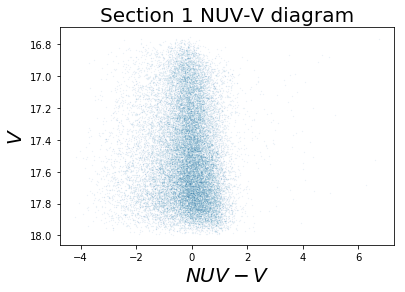

In [8]:
plt.scatter(NUV_magnitude_1 - Vmag_1, Vmag_1, s=0.03,alpha=0.2)
plt.ylim(reversed(plt.ylim()))
plt.xlabel("$NUV-V$", fontsize=20)
plt.ylabel("$V$", fontsize=20)
plt.title("Section 1 NUV-V diagram",fontsize=20)


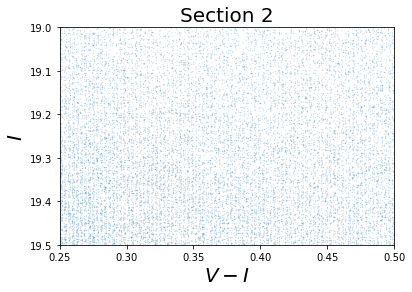

In [9]:
##---------------------------------SECTION 2---------------------------------------##
plt.scatter(catalog["Vmag"] - catalog["Imag"], catalog["Imag"], s=0.1,alpha=0.25)
plt.ylim(reversed(plt.ylim()))
plt.xlabel("$V-I$", fontsize=20)
plt.ylabel("$I$", fontsize=20)
plt.xlim(0.25,0.5)
plt.ylim(19.5,19)
plt.title("Section 2", fontsize=20)

In [10]:
ra_2=[]
dec_2=[]
Vmag_2=[]
for i in range(0,5156056):
    Vmag = catalog["Vmag"][i]
    Imag = catalog["Imag"][i]
    VImag = Vmag - Imag
    ra = catalog["RAJ2000"][i]
    dec = catalog["DEJ2000"][i]
    if 0.25 < VImag and VImag < 0.5 and 19 < Imag and Imag < 19.5:
        ra_2.append(ra)
        dec_2.append(dec)
        Vmag_2.append(Vmag)

loc_2 = Table()
loc_2['RAJ2000'] = ra_2
loc_2['DEJ2000'] = dec_2

In [11]:
positions_2 = SkyCoord(ra=loc_2['RAJ2000'] * u.deg, dec=loc_2['DEJ2000'] * u.deg, frame='fk5')
apertures_2 = SkyCircularAperture(positions_2, r)
phot_table_2 = aperture_photometry(hdu[0], apertures_2)
Flux_2 = phot_table_2['aperture_sum']
NUV_magnitude_2 = -2.5*np.log10(Flux_2) + 20.08

C:\Users\dougl\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: RuntimeWarning: invalid value encountered in log10


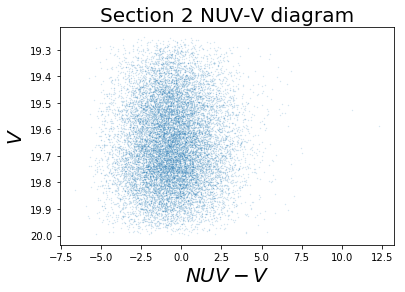

In [12]:
plt.scatter(NUV_magnitude_2 - Vmag_2, Vmag_2, s=0.1,alpha=0.25)
plt.ylim(reversed(plt.ylim()))
plt.xlabel("$NUV-V$", fontsize=20)
plt.ylabel("$V$", fontsize=20)
plt.title("Section 2 NUV-V diagram", fontsize=20)

In [13]:
##--------------------------SECTION 3---------------------------------##
ra_3=[]
dec_3=[]
Vmag_3=[]
for i in range(0,5156056):
    Vmag = catalog["Vmag"][i]
    Imag = catalog["Imag"][i]
    VImag = Vmag - Imag
    ra = catalog["RAJ2000"][i]
    dec = catalog["DEJ2000"][i]
    if 1 < VImag and VImag < 1.25 and 20.5 < Imag and Imag < 21.5:
        ra_3.append(ra)
        dec_3.append(dec)
        Vmag_3.append(Vmag)

loc_3 = Table()
loc_3['RAJ2000'] = ra_3
loc_3['DEJ2000'] = dec_3

In [14]:
positions_3 = SkyCoord(ra=loc_3['RAJ2000'] * u.deg, dec=loc_3['DEJ2000'] * u.deg, frame='fk5')
apertures_3 = SkyCircularAperture(positions_3, r)
phot_table_3 = aperture_photometry(hdu[0], apertures_3)
Flux_3 = phot_table_3['aperture_sum']
NUV_magnitude_3 = -2.5*np.log10(Flux_3) + 20.08

C:\Users\dougl\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: RuntimeWarning: invalid value encountered in log10


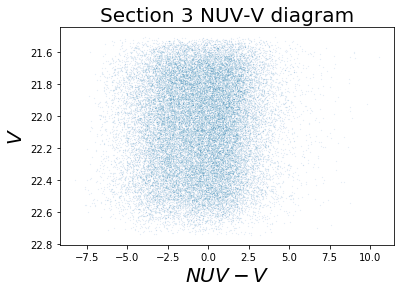

In [15]:
plt.scatter(NUV_magnitude_3 - Vmag_3, Vmag_3, s=0.03,alpha=0.25)
plt.ylim(reversed(plt.ylim()))
plt.xlabel("$NUV-V$", fontsize=20)
plt.ylabel("$V$", fontsize=20)
plt.title("Section 3 NUV-V diagram", fontsize=20)

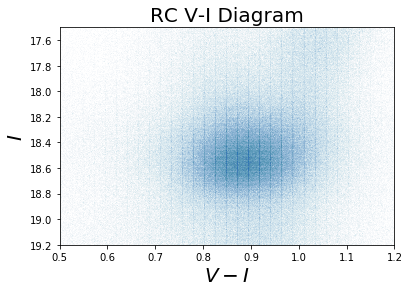

In [16]:
plt.scatter(catalog["Vmag"] - catalog["Imag"], catalog["Imag"], s=0.001, alpha=0.15)
plt.ylim(reversed(plt.ylim()))
plt.xlabel("$V-I$", fontsize=20)
plt.ylabel("$I$", fontsize=20)
plt.xlim(0.5,1.2)
plt.ylim(19.2,17.5)
plt.title("RC V-I Diagram", fontsize=20)

##------------------Trying to locate the Red Clump Stars----------------------------##

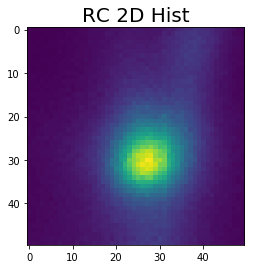

In [17]:
Vmag = catalog["Vmag"]
Imag = catalog["Imag"]
VImag = Vmag - Imag
NaNs1 = np.isnan(VImag)
NaNs2 = np.isnan(Imag)
VImag[NaNs1]= -9999
Imag[NaNs2] = -9999
bins = (50,50)
H, xedges, yedges = np.histogram2d(Imag, VImag, bins, range=[[17.5, 19.2], [0.5, 1.2]])
plt.imshow(H)
plt.title("RC 2D Hist", fontsize=20)

(50, 50)


<a list of 6 text.Text objects>

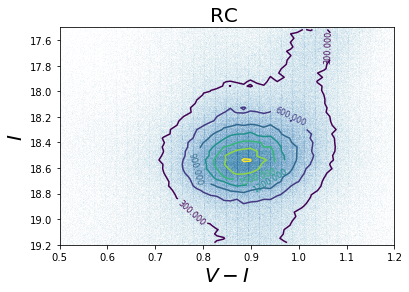

In [18]:
plt.figure(figsize=(20,20))
fig, ax = plt.subplots(nrows=1,ncols=1)
ax.scatter(catalog["Vmag"] - catalog["Imag"], catalog["Imag"], s=0.001, alpha=0.15)
H, xedges, yedges = np.histogram2d(VImag, Imag, bins, range=[[0.5, 1.2], [17.5, 19.2]])
print(H.shape)
extent = [xedges[0],xedges[-1],yedges[0],yedges[-1]]
cset1 = ax.contour(H.T,extent=extent,aspect=1,origin='lower')
plt.xlim(0.5,1.2)
plt.ylim(17.5,19.2)
plt.ylim(reversed(plt.ylim()))
plt.xlabel("$V-I$", fontsize=20)
plt.ylabel("$I$", fontsize=20)
plt.title("RC ", fontsize=20)
ax.clabel(cset1, fontsize=8)

<class 'list'>
<class 'list'>


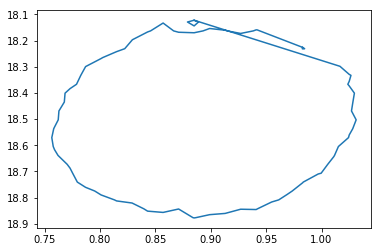

In [19]:
points = cset1.collections[1].get_paths()
print(type(points))

points2 =[[  0.88500003,  18.122275  ],
       [  0.88893753,  18.12900028],
       [  0.88500003,  18.14392712],
       [  0.87900003,  18.12900028],
       [  0.88500003,  18.122275  ],
       [  1.01670374,  18.298439  ],
       [  1.01680314,  18.29900036],
       [  1.02500004,  18.32925234],
       [  1.02655559,  18.33300037],
       [  1.02500004,  18.35566705],
       [  1.02374363,  18.36700039],
       [  1.02500004,  18.37343282],
       [  1.0296667 ,  18.4010004 ],
       [  1.02832055,  18.43500042],
       [  1.0270364 ,  18.46900043],
       [  1.03125536,  18.50300045],
       [  1.02816133,  18.53700047],
       [  1.02500004,  18.56080048],
       [  1.02433337,  18.57100048],
       [  1.01523533,  18.6050005 ],
       [  1.01172596,  18.63900051],
       [  1.01100003,  18.64406434],
       [  1.00561542,  18.67300053],
       [  0.9996667 ,  18.70700054],
       [  0.99700003,  18.71002277],
       [  0.98349415,  18.74100056],
       [  0.98300003,  18.74342913],
       [  0.97358624,  18.77500057],
       [  0.96900003,  18.78818425],
       [  0.96136367,  18.80900059],
       [  0.95500003,  18.81709583],
       [  0.94227276,  18.8430006 ],
       [  0.94100003,  18.84589422],
       [  0.92700003,  18.84471778],
       [  0.91300003,  18.86078043],
       [  0.89900003,  18.86551413],
       [  0.88650003,  18.87700062],
       [  0.88500003,  18.87794506],
       [  0.88397564,  18.87700062],
       [  0.87100003,  18.8438724 ],
       [  0.85700002,  18.85694061],
       [  0.84300002,  18.85203858],
       [  0.8395412 ,  18.8430006 ],
       [  0.82900002,  18.82102079],
       [  0.81500002,  18.81296726],
       [  0.81307845,  18.80900059],
       [  0.80100002,  18.79006387],
       [  0.79523531,  18.77500057],
       [  0.78700002,  18.76095098],
       [  0.77958211,  18.74100056],
       [  0.77534901,  18.70700054],
       [  0.77300002,  18.68768235],
       [  0.77039218,  18.67300053],
       [  0.76214287,  18.63900051],
       [  0.75900002,  18.6170005 ],
       [  0.75783335,  18.6050005 ],
       [  0.75652943,  18.57100048],
       [  0.75826318,  18.53700047],
       [  0.75900002,  18.53062546],
       [  0.76233947,  18.50300045],
       [  0.76297635,  18.46900043],
       [  0.7678369 ,  18.43500042],
       [  0.76850528,  18.4010004 ],
       [  0.77300002,  18.38371706],
       [  0.77885818,  18.36700039],
       [  0.78269233,  18.33300037],
       [  0.78700002,  18.29982963],
       [  0.7872414 ,  18.29900036],
       [  0.80100002,  18.26871909],
       [  0.80250771,  18.26500034],
       [  0.81500002,  18.24233367],
       [  0.82238184,  18.23100033],
       [  0.82900002,  18.19825957],
       [  0.82920898,  18.19700031],
       [  0.84300002,  18.1670803 ],
       [  0.84568087,  18.1630003 ],
       [  0.85700002,  18.13295377],
       [  0.86650002,  18.1630003 ],
       [  0.87100003,  18.16818674],
       [  0.88500003,  18.17010939],
       [  0.89305003,  18.1630003 ],
       [  0.89900003,  18.15382569],
       [  0.91300003,  18.16042454],
       [  0.91494447,  18.1630003 ],
       [  0.92700003,  18.17275956],
       [  0.93842108,  18.1630003 ],
       [  0.94100003,  18.1589664 ],
       [  0.94195288,  18.15920925],
       [  0.98300003,  18.22614318],
       [  0.98262165,  18.23100033],
       [  0.98300003,  18.23173946],
       [  0.98475003,  18.23100033],
       [  0.98300003,  18.22614318]]

print(type(points2))

testList2 = []
x1 = []
y1 = []
for (elem1, elem2) in points2:
    testList2 += [(elem1, elem2)]
    x1 += [elem1]
    y1 += [elem2]

zip(*testList2)
plt.plot(*zip(*testList2))
plt.ylim(reversed(plt.ylim()))
plt.show()

x1 = np.array(x1)
x2= x1.flatten()

y1 = np.array(y1)
y2 = y1.flatten()

[ 0.13456411  0.36261906]


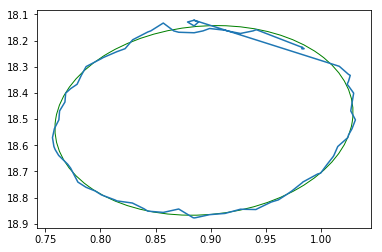

In [20]:

def fitEllipse(x,y):
    x = x[:,np.newaxis]
    y = y[:,np.newaxis]
    D =  np.hstack((x*x, x*y, y*y, x, y, np.ones_like(x)))
    S = np.dot(D.T,D)
    C = np.zeros([6,6])
    C[0,2] = C[2,0] = 2; C[1,1] = -1
    E, V =  eig(np.dot(inv(S), C))
    n = np.argmax(np.abs(E))
    a = V[:,n]
    return a

def ellipse_center(a):
    b,c,d,f,g,a = a[1]/2, a[2], a[3]/2, a[4]/2, a[5], a[0]
    num = b*b-a*c
    x0=(c*d-b*f)/num
    y0=(a*f-b*d)/num
    return np.array([x0,y0])

def ellipse_angle_of_rotation( a ):
    b,c,d,f,g,a = a[1]/2, a[2], a[3]/2, a[4]/2, a[5], a[0]
    if b == 0:
        if a > c:
            return 0
        else:
            return np.pi/2
    else:
        if a > c:
            return np.arctan(2*b/(a-c))/2
        else:
            return np.pi/2 + np.arctan(2*b/(a-c))/2
        
def ellipse_axis_length( a ):
    b,c,d,f,g,a = a[1]/2, a[2], a[3]/2, a[4]/2, a[5], a[0]
    up = 2*(a*f*f+c*d*d+g*b*b-2*b*d*f-a*c*g)
    down1=(b*b-a*c)*( (c-a)*np.sqrt(1+4*b*b/((a-c)*(a-c)))-(c+a))
    down2=(b*b-a*c)*( (a-c)*np.sqrt(1+4*b*b/((a-c)*(a-c)))-(c+a))
    res1=np.sqrt(up/down1)
    res2=np.sqrt(up/down2)
    return np.array([res1, res2])

a = fitEllipse(x=x2,y=y2)
center = ellipse_center(a)
phi = ellipse_angle_of_rotation(a)
axes = ellipse_axis_length(a)

print(axes)

b1, a1 = axes
angle1 = np.degrees(phi)
fig, ax = plt.subplots(nrows=1,ncols=1)
g_ell_center = (0.89392022,18.5051778)
g_ellipse = patches.Ellipse(g_ell_center, 0.72523812, 0.26912822, angle=angle1, fill=False, edgecolor='green')
ax.add_patch(g_ellipse)

from pylab import *
plt.plot(*zip(*testList2))
plt.ylim(reversed(plt.ylim()))
show()

(19.199999999999999, 17.5)

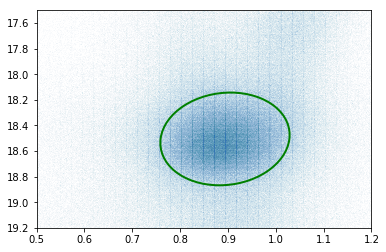

In [21]:
plt.figure(figsize=(8,8))
fig, ax = plt.subplots(nrows=1,ncols=1)
g_ell_center = (0.89392022,18.5051778)
g_ellipse = patches.Ellipse(g_ell_center, 0.72523812, 0.26912822, angle=angle1, fill=False, edgecolor='green', linewidth=2)
ax.add_patch(g_ellipse)
ax.scatter(catalog["Vmag"] - catalog["Imag"], catalog["Imag"], s=0.001, alpha=0.15)

plt.xlim(0.5,1.2)
plt.ylim(17.5,19.2)
plt.ylim(reversed(plt.ylim()))

In [67]:
cos_angle = np.cos(np.radians(180.-angle1))
sin_angle = np.sin(np.radians(180.-angle1))
RC_ra=[]
RC_dec=[]
RC_Vmag=[]
RC_VImag=[]
RC_Imag=[]

for i in range(0,5156056):
    Vmag = catalog["Vmag"][i]
    Imag = catalog["Imag"][i]
    VImag = Vmag - Imag
    ra = catalog["RAJ2000"][i]
    dec = catalog["DEJ2000"][i]

    xc = VImag - g_ell_center[0]
    yc = Imag - g_ell_center[1]

    xct = xc * cos_angle - yc * sin_angle
    yct = xc * sin_angle + yc * cos_angle 

    rad_cc = (xct**2/(0.72523812/2.)**2) + (yct**2/(0.26912822/2.)**2)

    if rad_cc <= 1.:
        # point in ellipse
        RC_ra.append(ra)
        RC_dec.append(dec)
        RC_Vmag.append(Vmag)
        RC_VImag.append(VImag)
        RC_Imag.append(Imag)

In [68]:
RC_loc = Table()
RC_loc['RAJ2000'] = RC_ra
RC_loc['DEJ2000'] = RC_dec
print(RC_loc)

 RAJ2000   DEJ2000 
--------- ---------
 5.629545 -74.83324
 5.637225 -74.86771
 5.637405 -74.84274
 5.639715 -74.87654
 5.661735 -74.69741
  5.66385 -74.83868
  5.66781 -74.81807
  5.66976 -74.90128
  5.67471 -74.89833
 5.685795 -74.74405
      ...       ...
 20.56878 -74.62782
 20.57388 -74.69594
20.574525 -74.82275
 20.57655  -74.8679
 20.57928 -74.87347
  20.5866 -74.78902
 20.59179 -74.82719
 20.59272 -74.71071
20.596725 -74.78487
20.604765 -74.69199
 20.61288 -74.87856
Length = 351217 rows


(19.199999999999999, 17.5)

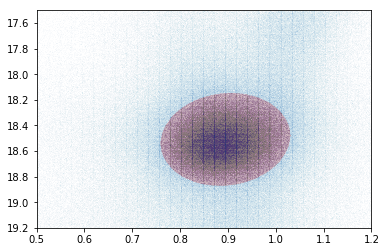

In [69]:
fig,ax = plt.subplots(1)
ax.scatter(RC_VImag,RC_Imag, s=0.001, c='r', alpha=0.15)
ax.scatter(catalog["Vmag"] - catalog["Imag"], catalog["Imag"], s=0.001, alpha=0.15)
plt.xlim(0.5,1.2)
plt.ylim(17.5,19.2)
plt.ylim(reversed(plt.ylim()))

In [23]:
RC_positions = SkyCoord(ra=RC_loc['RAJ2000'] * u.deg, dec=RC_loc['DEJ2000'] * u.deg, frame='fk5')
RC_apertures = SkyCircularAperture(RC_positions, r)
RC_phot_table = aperture_photometry(hdu[0], RC_apertures)
print(RC_phot_table)
RC_Flux = RC_phot_table['aperture_sum']
NUV_magnitude = -2.5*np.log10(RC_Flux) + 20.08

  id        xcenter       ...    aperture_sum   
              pix         ...                   
------ ------------------ ... ------------------
     1 20531.716529022127 ...     0.141092599687
     2 20578.413819220787 ...    0.0438408103614
     3 20517.066745073895 ...    0.0339459423203
     4  20523.36764356137 ...    0.0306907491726
     5  20485.02173133492 ...    0.0366781419874
     6  20592.99873082887 ...      1.13752454426
     7  20545.00420573388 ...     0.174918598174
     8 20549.788789574293 ...     0.067693484731
     9 20579.123354346848 ...    0.0227939265487
    10  20605.85749122272 ...    0.0496355022642
   ...                ... ...                ...
230249  11154.41845764132 ...    0.0418234042601
230250 11164.018979139812 ...  -0.00663877388736
230251  11192.78343208734 ...     0.442995191757
230252  11192.06416988169 ...  -0.00193818042563
230253 11191.412278643324 ...   0.00642931025272
230254 11148.452234629183 ...    0.0733789998142
230255 11176.6066315

C:\Users\dougl\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: RuntimeWarning: invalid value encountered in log10


C:\Users\dougl\Anaconda3\lib\site-packages\astropy\visualization\stretch.py:115: RuntimeWarning: invalid value encountered in sqrt
  np.sqrt(values, out=values)
C:\Users\dougl\Anaconda3\lib\site-packages\matplotlib\colors.py:494: RuntimeWarning: invalid value encountered in less
  cbook._putmask(xa, xa < 0.0, -1)


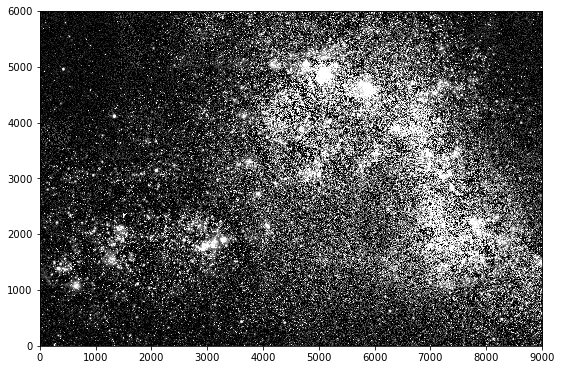

In [44]:
plt.figure(figsize=(9,9))
fig,ax = plt.subplots(1)
norm = ImageNormalize(stretch=SqrtStretch())
image_data = hdu[0].data
position = (13600, 10400)
size = (6000, 9000)
cutout = Cutout2D(image_data, position, size)
plt.imshow(cutout.data, norm=norm, origin = 'lower', cmap='Greys_r', vmin=0, vmax=0.09)
plt.show()

In [35]:
hdu.info()

Filename: C:/Users/dougl/Desktop/smcw2-nd-intbgsub.fits
No.    Name         Type      Cards   Dimensions   Format
  0  PRIMARY     PrimaryHDU      18   (27207, 20790)   float32   


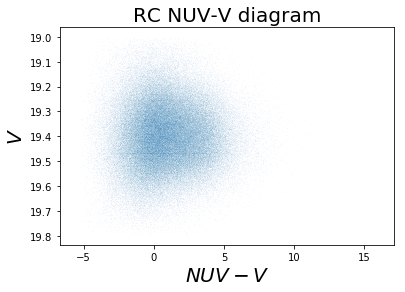

In [129]:
plt.scatter(NUV_magnitude - RC_Vmag, RC_Vmag, s=0.01,alpha=0.09)
plt.ylim(reversed(plt.ylim()))
plt.xlabel("$NUV-V$", fontsize=20)
plt.ylabel("$V$", fontsize=20)
plt.title("RC NUV-V diagram", fontsize=20)


C:\Users\dougl\Anaconda3\lib\site-packages\numpy\lib\function_base.py:747: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= mn)
C:\Users\dougl\Anaconda3\lib\site-packages\numpy\lib\function_base.py:748: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= mx)


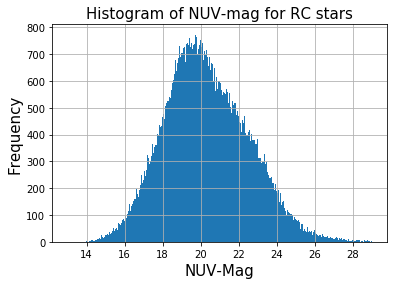

In [140]:
NUV_Mag2 = np.asarray(NUV_magnitude)
NUV_Mag = NUV_Mag2.flatten()
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import norm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

plt.hist(NUV_Mag,bins=800,range=(13,29))
plt.xlabel("NUV-Mag", fontsize=15)
plt.ylabel("Frequency", fontsize=15)
plt.title(r'Histogram of NUV-mag for RC stars', fontsize=15)
plt.grid(True)
plt.show()